In [1]:
% pylab inline
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pylab as pb
from matplotlib import cm
from scipy.stats import norm
from scipy.special import gamma
from scipy.stats import chi
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal

Populating the interactive namespace from numpy and matplotlib


[-4.0, 4.0, 0, 2.0]

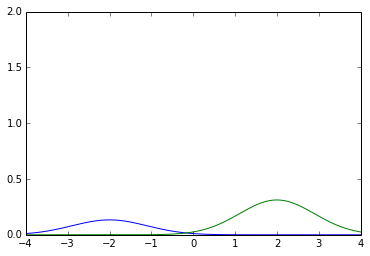

In [2]:
X_eval = np.linspace(-4.0,4.0,1000)
mean_1 = -2.0
mean_2 = 2.0
var_1 = var_2 = 0.8
Y1 = norm.pdf(X_eval, mean_1, np.sqrt(var_1))*0.3
Y2 = norm.pdf(X_eval, mean_2, np.sqrt(var_2))*0.7
pb.plot(X_eval, Y1)
pb.plot(X_eval, Y2)
plt.axis([-4.0, 4.0, 0, 2.0])

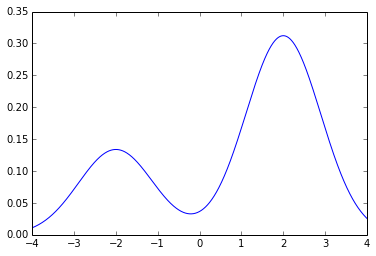

In [3]:
Y_mix = Y1 + Y2
pb.plot(X_eval, Y_mix)

In [4]:
N = 1000
choices = np.random.binomial(1,0.3, N)
X = np.zeros(N)
for i in range(0,choices.shape[0]):
    if choices[i]:
        X[i] = np.asscalar(np.random.normal(mean_1, np.sqrt(var_1),1))
    else:
        X[i] = np.asscalar(np.random.normal(mean_2, np.sqrt(var_2),1))
        
#print X       

In [5]:
def approx(X, X_ev, h, N):
    P_X = np.copy(X)
    msum = np.zeros(N)
    for j in range(0,N):
        msum += norm.pdf(X_ev, X[j], np.sqrt(h))
    P_X = msum/N
    return P_X

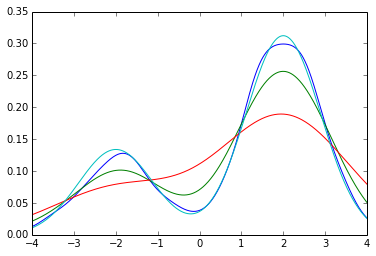

In [6]:
P_X = approx(X, X_eval, 0.1, N)
pb.plot(X_eval, P_X)
P_X = approx(X, X_eval, 0.5, N)
pb.plot(X_eval, P_X)
P_X = approx(X,X_eval, 1.6, N)
pb.plot(X_eval, P_X)
pb.plot(X_eval, Y_mix)

## inversion method

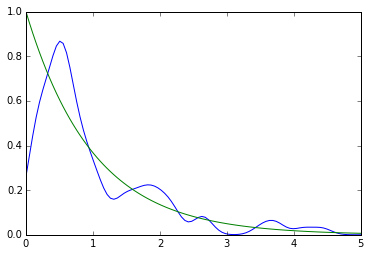

In [145]:
N = 100
y = np.random.uniform(0.0,1.0,N)
mlambda = 1.0
Z = (-1.0/mlambda)*np.log(1.0 - y)

X_eval = np.linspace(0.0, 5.0, N)
P_X = approx(Z, X_eval, 0.02, N)
pb.plot(X_eval, P_X)

Y_exp = mlambda*np.exp(-mlambda*X_eval)
pb.plot(X_eval, Y_exp)

## When inversion of CDF is unknown, Sampling by rejection

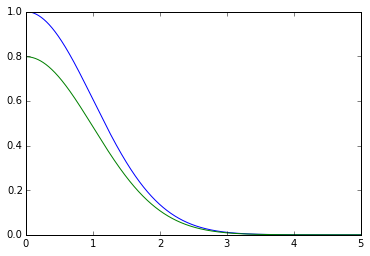

In [217]:
N = 100000
X_eval = np.linspace(0.0, 5.0, N)
var_1 = 0.5
Y_eval = np.exp((-1.0*np.power(X_eval, 2))/2.0)
Y_eval_norm = Y_eval*(2.0/np.sqrt(2.0*math.pi))
pb.plot(X_eval, Y_eval)
pb.plot(X_eval, Y_eval_norm)

In [218]:
k = np.sqrt(np.exp(1.0))
def get_samples_reject(number):
    prop_samples = np.random.exponential(size=number)
    uniform_samples = np.random.uniform(size=number) * k * stats.expon.pdf(prop_samples)
    cond = uniform_samples <= np.exp((-1.0*np.power(prop_samples, 2))/2.0)
    return prop_samples[cond]

sample_estim = get_samples_reject(N)
X_eval = np.linspace(0.0, 5.0, sample_estim.shape[0])
print sample_estim.shape, X_eval.shape

(76117,) (76117,)


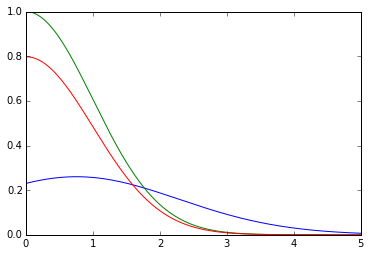

In [219]:
P_Z = approx(sample_estim, X_eval, 2.0, X_eval.shape[0])
N = P_Z.shape[0]
X_eval = np.linspace(0.0, 5.0, N)
var_1 = 0.5
Y_eval = np.exp((-1.0*np.power(X_eval, 2))/2.0)
Y_eval_norm = Y_eval*(2.0/np.sqrt(2.0*math.pi))
pb.plot(X_eval, P_Z)
pb.plot(X_eval, Y_eval)
pb.plot(X_eval, Y_eval_norm)

## Fitting a Gaussian posterior with rejection sampling

In [326]:
mu0 = 0.0
var0 = 5.0


mean_real = 0.8
var_real = 0.2
N = 10000
X = np.random.normal(mean_real, np.sqrt(var_real), N)
#print X

def parzenmio(X, X_ev, h, N):
    P_X = np.copy(X)
    msum = np.zeros(N)
    for j in range(0,N):
        msum += norm.pdf(X_ev, X[j], np.sqrt(h))
    P_X = msum/N
    return P_X

def parzendiego(x, samples, h2, N):
    N = np.size(samples)
    ret = np.zeros(np.size(x))
    for i in xrange(N):
        ret += stats.multivariate_normal.pdf(x, samples[i], h2)
    return ret / N

def likelihood_gaussian(X_ev, mu, sigma):
    ret = np.copy(mu)
    for i in range(0,mu.shape[0]):
        tmp = norm.pdf(X_ev, mu[i], np.sqrt(sigma))
        #print tmp.shape
        ret[i] = np.asscalar(np.prod(tmp))
    return ret

def compute_k(X_ev):
    k = np.sum(X_ev)/X_ev.shape[0]
    ml_mean = np.zeros(1)
    ml_mean[0] = np.asscalar(k)
    ret = likelihood_gaussian(X_ev, ml_mean, var_real)
    return np.asscalar(ret)

def get_samples_reject(X, number):
    prop_samples = np.random.normal(mu0, np.sqrt(var0), number)
    k = compute_k(X)
    uniform_samples = np.random.uniform(size=number) * k * norm.pdf(prop_samples, mu0, np.sqrt(var0))
    cond = uniform_samples <= np.multiply(likelihood_gaussian(X, prop_samples, var_real),norm.pdf(prop_samples, mu0, np.sqrt(var0)))
    return prop_samples[cond]

Z = get_samples_reject(X, N)
print Z.shape

1
10000
(10000,)


In [321]:
X_eval = np.linspace(-2.0,2.0,Z.shape[0])
Y = norm.pdf(X_eval, mean_real, np.sqrt(var_real))

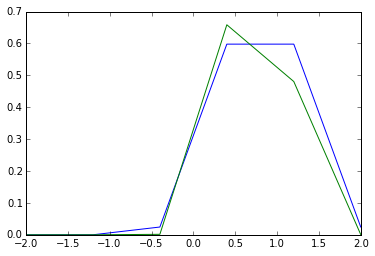

In [322]:
P_Z = parzenmio(Z, X_eval, 0.1, Z.shape[0])
pb.plot(X_eval, Y)
pb.plot(X_eval, P_Z)